# Introduction to the Generalised Linear Mixed Model.


The Generalised Linear Mixed Model (GLMM) is an extension of the Generalised Linear Model (GLM) that allows for the inclusion of both fixed and random effects, enabling the modelling of data with correlated observations or hierarchical (multilevel) structures. It provides a unified framework for handling non-Gaussian responses (e.g. binary, count, proportion data) while accounting for group-level variation and dependence among observations.

### Definitions:

**Fixed effects** represent the systematic, deterministic part of the model — effects that are the same across all groups
and describe the average relationship between predictors and the response.

In the linear predictor:

$$
\eta_i = \mathbf{x}_i^\top \boldsymbol{\beta} + \mathbf{z}_i^\top \mathbf{u},
$$

the term $ \mathbf{x}_i^\top \boldsymbol{\beta} = x_{i1}\beta_1 + \dots + x_{in}\beta_n $  contains the fixed effects.

- $ \mathbf{x}_i $: vector of observed covariates for observation \( i \)
- $ \boldsymbol{\beta} $: coefficients that apply to *every* observation

Interpretation: 
Fixed effects quantify how predictor variables influence the outcome *on average*, assuming other effects are held constant.

Example (cricket):
- The coefficient on `runrate10` (run rate in first 10 overs) measures how an increase in early run rate affects the probability of winning, on average across all teams and matches.


**Random effects** capture group-level variation that is not explained by the fixed effects.
They allow certain parameters (often intercepts or slopes) to vary across clusters, such as matches, teams, or players.

In the same model:

$$
\eta_i = \mathbf{x}_i^\top \boldsymbol{\beta} + \mathbf{z}_i^\top \mathbf{u},
$$

the term $ \mathbf{z}_i^\top \mathbf{u} $ represents the random effects, where

$$
\mathbf{u} \sim \mathcal{N}(\mathbf{0}, \mathbf{G}).
$$

- $ \mathbf{u} $: random-effect coefficients, one per group (e.g., per match or team)  
- $ \mathbf{G} $: covariance matrix describing how random effects vary across groups  

Interpretation:  
Random effects model unobserved heterogeneity — systematic differences between groups that we treat as random draws
from a population distribution.

Example (cricket):
- A random intercept for `match_id` allows each match to have its own baseline win probability.  
- A random intercept for `batting_team` lets some teams have consistently higher or lower win probabilities than others.


A **hierarchical structure** (or multilevel structure) arises when data are nested — for example, balls within matches,
matches within tournaments, or players within teams.

Such nesting violates the independence assumption of ordinary regression.
Mixed-effects models account for this by adding random effects for each level of the hierarchy.

Formally, suppose each observation  $i$ belongs to a group $g(i)$.
Then:

$$
Y_i \mid \mathbf{u}_{g(i)} \sim \text{Bernoulli}(\pi_i), \qquad
\text{logit}(\pi_i) = \mathbf{x}_i^\top \boldsymbol{\beta} + u_{g(i)},
$$

where $ u_{g(i)} \sim \mathcal{N}(0, \sigma^2_u) $ is the random intercept for group $g$.

Interpretation:  
- Observations within the same group (e.g., same match) share a common random effect, so they are correlated.  
- The model performs partial pooling: it shrinks group-level estimates toward the overall mean depending on the variance \( \sigma^2_u \).

Example (cricket):
- Balls are nested within matches → random intercept per `match_id`.  
- Matches are nested within teams → random intercept per `batting_team` or `bowling_team`.  
- The hierarchy might look like:



### Generalised Linear Model:

A generalized linear model (GLM) assumes that each response $ Y_i $ comes from the exponential family:

$$
f(y_i; \theta_i, \phi)
= \exp\!\left\{
    \frac{y_i \theta_i - b(\theta_i)}{a(\phi)} + c(y_i, \phi)
\right\}.
$$

We define a link function $g(\cdot)$ relating the expected value $ \mu_i = \mathbb{E}[Y_i] $ to the linear predictor:

$$
\eta_i = \mathbf{x}_i^\top \boldsymbol{\beta}, \qquad
g(\mu_i) = \eta_i.
$$

For binary outcomes (e.g., win/loss), the logit link function is one widely used function:

$$
g(\mu_i) = \log \frac{\mu_i}{1 - \mu_i},
\quad
\mu_i = \Pr(Y_i = 1) = \text{logit}^{-1}(\mathbf{x}_i^\top \boldsymbol{\beta}).
$$


### From GLM to GLMM:

A GLMM extends the GLM by introducing random effects $ \mathbf{u} $ that capture correlation or hierarchical structure
(e.g., balls within matches, teams, or players).

The linear predictor becomes:

$$
\eta_i = \mathbf{x}_i^\top \boldsymbol{\beta} + \mathbf{z}_i^\top \mathbf{u},
$$

where
- $ \mathbf{x}_i $: fixed-effect covariates  
- $ \boldsymbol{\beta} $: fixed-effect coefficients  
- $ \mathbf{z}_i $: design vector for random effects  
- $ \mathbf{u} \sim \mathcal{N}(\mathbf{0}, \mathbf{G}) $: random effects with covariance matrix $ \mathbf{G} $


### Choice of Link function:

| **Distribution (Family)** | **Response Type** | **Link Function \( g(\mu) \)** | **Inverse Link $g^{-1}(\eta) $** | **Typical Use Case / Interpretation** |
|----------------------------|-------------------|---------------------------------|-------------------------------------|----------------------------------------|
| **Gaussian (Normal)** | Continuous | $ g(\mu) = \mu $*(Identity)* | $ g^{-1}(\eta) = \eta $| Standard linear regression where the mean is modeled directly. |
| **Binomial (Logistic)** | Binary / Proportion | $g(\mu) = \log\frac{\mu}{1 - \mu} $ *(Logit)* | $ g^{-1}(\eta) = \frac{e^{\eta}}{1 + e^{\eta}} $ | Logistic regression — modeling probability of success (e.g., team win). |
| **Binomial (Probit)** | Binary / Proportion | $ g(\mu) = \Phi^{-1}(\mu) $ | $ g^{-1}(\eta) = \Phi(\eta) $ | Probit regression — assumes latent normal variable drives probability. |
| **Poisson** | Count data | $ g(\mu) = \log(\mu) $ | $ g^{-1}(\eta) = e^{\eta} $ | Modeling counts or rates (e.g., number of wickets, runs). |
| **Gamma** | Positive continuous | $ g(\mu) = \log(\mu) $| $ g^{-1}(\eta) = e^{\eta} $ | Modeling skewed positive data (e.g., waiting times, run rates). |



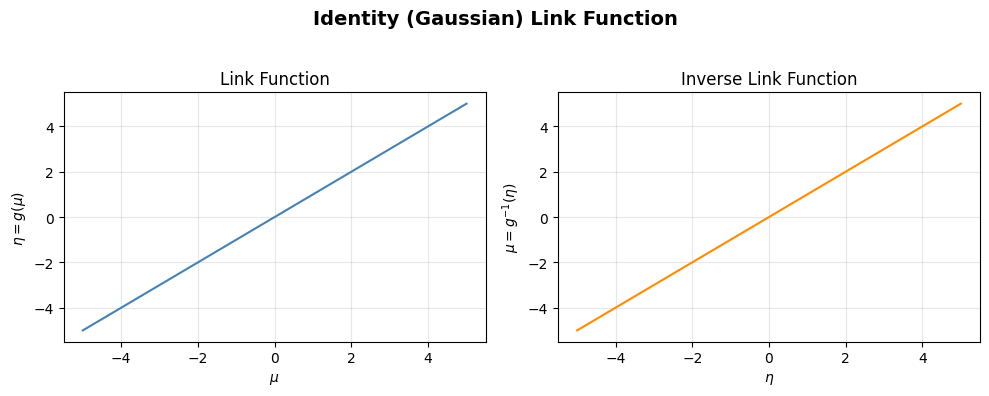

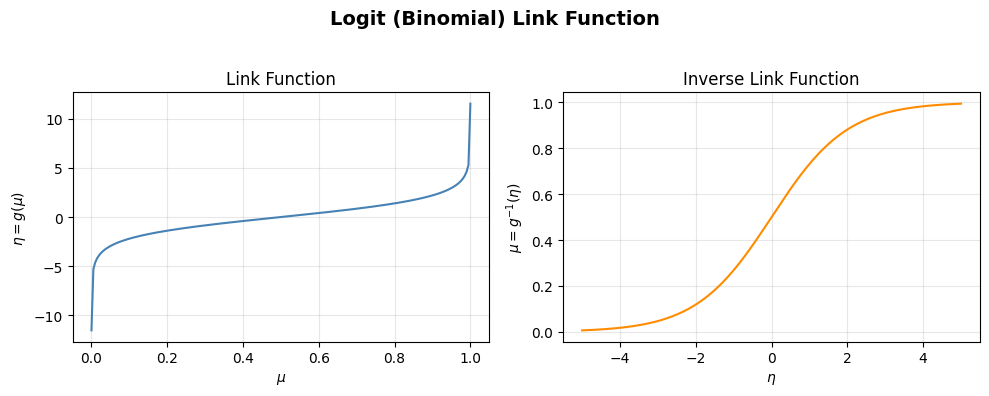

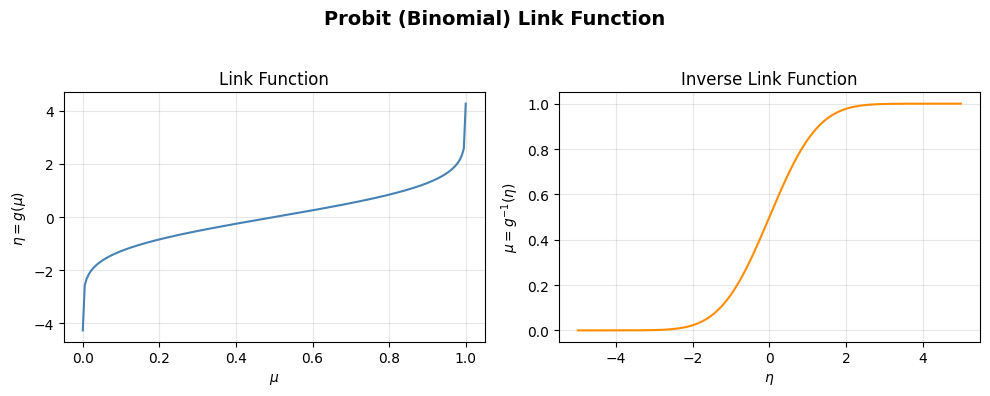

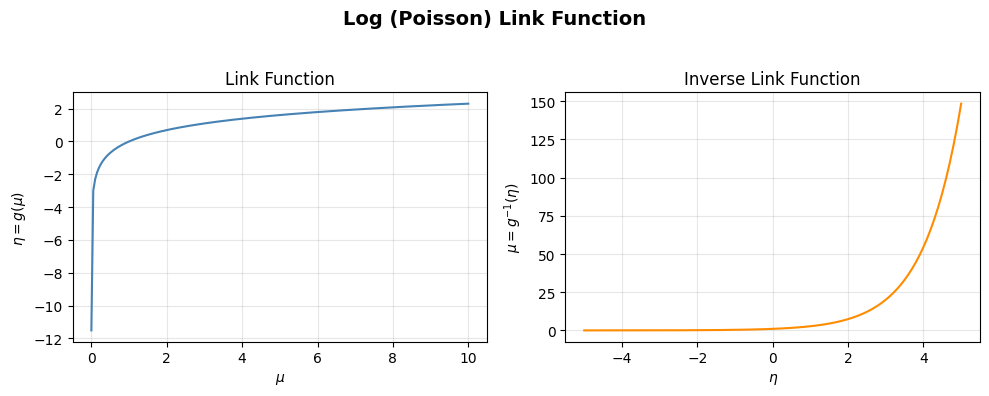

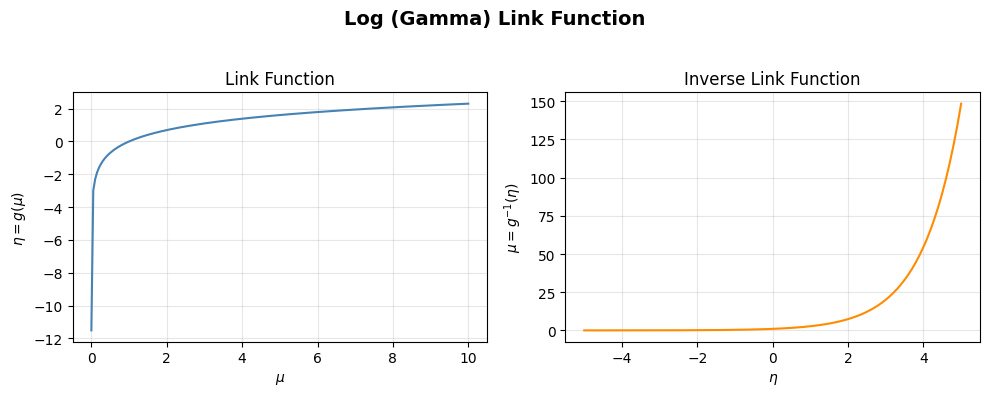

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Domains
mu_prob = np.linspace(1e-5, 1-1e-5, 200)
mu_pos  = np.linspace(1e-5, 10, 200)
eta = np.linspace(-5, 5, 200)

# Define link and inverse link functions
links = {
    "Identity (Gaussian)": {
        "g(mu)": lambda mu: mu,
        "g_inv(eta)": lambda eta: eta,
        "mu_domain": np.linspace(-5, 5, 200)
    },
    "Logit (Binomial)": {
        "g(mu)": lambda mu: np.log(mu / (1 - mu)),
        "g_inv(eta)": lambda eta: 1 / (1 + np.exp(-eta)),
        "mu_domain": mu_prob
    },
    "Probit (Binomial)": {
        "g(mu)": lambda mu: norm.ppf(mu),
        "g_inv(eta)": lambda eta: norm.cdf(eta),
        "mu_domain": mu_prob
    },
    "Log (Poisson)": {
        "g(mu)": lambda mu: np.log(mu),
        "g_inv(eta)": lambda eta: np.exp(eta),
        "mu_domain": mu_pos
    },
    "Log (Gamma)": {
        "g(mu)": lambda mu: np.log(mu),
        "g_inv(eta)": lambda eta: np.exp(eta),
        "mu_domain": mu_pos
    }
}

# Plot each link and its inverse in separate figures
for name, funcs in links.items():
    mu = funcs["mu_domain"]
    g = funcs["g(mu)"]
    g_inv = funcs["g_inv(eta)"]
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(f"{name} Link Function", fontsize=14, fontweight='bold')
    
    # Link function g(mu)
    axes[0].plot(mu, g(mu), color='steelblue')
    axes[0].set_xlabel(r"$\mu$")
    axes[0].set_ylabel(r"$\eta = g(\mu)$")
    axes[0].set_title("Link Function")
    axes[0].grid(alpha=0.3)
    
    # Inverse link function g^{-1}(eta)
    axes[1].plot(eta, g_inv(eta), color='darkorange')
    axes[1].set_xlabel(r"$\eta$")
    axes[1].set_ylabel(r"$\mu = g^{-1}(\eta)$")
    axes[1].set_title("Inverse Link Function")
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


### Logistic Mixed - Effects Model:

For a binary response $ Y_i \in \{0, 1\} $, such as predicting whether Team A wins, we write:

$$
\Pr(Y_i = 1 \mid \mathbf{u}) = \pi_i(\mathbf{u})
= \text{logit}^{-1}(\eta_i)
= \frac{\exp(\eta_i)}{1 + \exp(\eta_i)},
$$

with

$$
\eta_i = \mathbf{x}_i^\top \boldsymbol{\beta} + \mathbf{z}_i^\top \mathbf{u}.
$$

The conditional likelihood for one observation is:

$$
p(y_i \mid \mathbf{u}) = \pi_i(\mathbf{u})^{y_i}
\big(1 - \pi_i(\mathbf{u})\big)^{1 - y_i}.
$$


### Example Random-Effects Structure:

We index each ball $ i $ within match $ m(i) $, with random effects such as:

$$
\mathbf{u} =
\begin{bmatrix}
u^{(\text{match})}_m \\
u^{(\text{batteam})}_b \\
u^{(\text{bowteam})}_o
\end{bmatrix},
\qquad
u^{(\cdot)} \sim \mathcal{N}(0, \sigma^2_{\cdot}).
$$

The linear predictor could then be:

$$
\eta_i = \mathbf{x}_i^\top \boldsymbol{\beta}
+ u^{(\text{match})}_{m(i)}
+ u^{(\text{batteam})}_{\text{bat}(i)}
+ u^{(\text{bowteam})}_{\text{bowl}(i)}.
$$

Typical covariates in $ \mathbf{x}_i $ might include:
- runs scored in first 10 overs  
- wickets lost  
- run rate, extras, toss outcome  
- batting/bowling style indicators  
- home/away match indicator


### Marginal Likelihood and Estimation:

Because random effects $ \mathbf{u}$ are unobserved, the marginal likelihood integrates them out:

$$
L(\boldsymbol{\beta}, \mathbf{G})
= \prod_{c=1}^C
\int
\Bigg[
\prod_{i \in c}
p(y_i \mid \mathbf{u}_c; \boldsymbol{\beta})
\Bigg]
\phi(\mathbf{u}_c; \mathbf{0}, \mathbf{G}) \, d\mathbf{u}_c.
$$

This integral is analytically intractable, so we use approximations:
- Laplace approximation (default in `lme4::glmer`)
- Adaptive Gauss–Hermite quadrature (accurate but slower)
- Bayesian MCMC / INLA (full posterior inference)


### Inference and Interpretation:

For prediction, the marginal probability for a new observation is:

$$
\Pr(Y_* = 1 \mid \text{data})
\approx
\int
\text{logit}^{-1}(\mathbf{x}_*^\top \hat{\boldsymbol{\beta}} + \mathbf{z}_*^\top \mathbf{u})
\, p(\mathbf{u} \mid \text{data}) \, d\mathbf{u}.
$$

In practice, we often plug in the estimated random effects $ \hat{\mathbf{u}} $ (conditional mode).

To interpret variance components in logistic mixed models, use the latent variable approximation:
the residual variance of the logistic distribution is $ \pi^2 / 3 $, giving an intra-class correlation (ICC):

$$
\text{ICC} \approx \frac{\sigma_u^2}{\sigma_u^2 + \pi^2/3}.
$$


### Example Cricket Task:

Let $ Y_i = 1 $ if the batting team eventually wins the match.

$$
Y_i \mid \mathbf{u} \sim \text{Bernoulli}(\pi_i),
\qquad
\pi_i = \text{logit}^{-1}(\eta_i),
$$

with

$$
\eta_i =
\mathbf{x}_i^\top \boldsymbol{\beta}
+ u^{(\text{match})}_{m(i)}
+ u^{(\text{batteam})}_{\text{bat}(i)}
+ u^{(\text{bowteam})}_{\text{bowl}(i)}.
$$

Random effects:

$$
u^{(\text{match})}_m \sim \mathcal{N}(0, \sigma^2_\text{match}), \quad
u^{(\text{batteam})}_b \sim \mathcal{N}(0, \sigma^2_\text{bat}), \quad
u^{(\text{bowteam})}_o \sim \mathcal{N}(0, \sigma^2_\text{bowl}).
$$

This can be fitted in R with:
```r
glmer(
  winner ~ runs10 + wickets10 + runrate10 + toss_winner + toss_decision +
    (1 | match_id) + (1 | batting_team) + (1 | bowling_team),
  data = cricket,
  family = binomial(link = "logit")
)


## References: